In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from datetime import datetime

In [2]:
df_us = pd.read_csv('./videos/USvideos.csv')
df_us.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


## Data Cleaning

In [3]:
# remove duplicates
print('# rows before cleaning duplicates: ', df_us.shape[0])
df_us.drop_duplicates(keep="first", inplace=True)
print('# rows after cleaning duplicates: ', df_us.shape[0], '\n')

# rows before cleaning duplicates:  40949
# rows after cleaning duplicates:  40901 



In [4]:
# convert strings to Datetime objects
df_us.publish_time = pd.to_datetime(df_us.publish_time)
df_us.trending_date = df_us.trending_date.apply(lambda x : datetime.strptime(x, "%y.%d.%m"))
df_us.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01+00:00,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00+00:00,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24+00:00,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04+00:00,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41+00:00,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...


## Train Linear Regression for Predicting View Count

In [5]:
x_train, x_test, y_train, y_test = train_test_split(df_us[['likes', 'dislikes', 'comment_count']], df_us[['views']], test_size=0.2)
model = LinearRegression()
model.fit(X=x_train, y=y_train)
ans = model.predict(X=[[100000, 20000, 5000]])
print('# Views predicted for a video with 100000 likes, 20000 dislikes, and 5000 comments: ', ans[0][0])

# Views predicted for a video with 100000 likes, 20000 dislikes, and 5000 comments:  4881018.3656896595


In [6]:
coef = model.coef_
print('Likes correlation: ', coef[0][0])
print('Dislikes correlation: ', coef[0][1])
print('Comment Count correlation: ', coef[0][2])

Likes correlation:  34.973124612168334
Dislikes correlation:  79.68385892678529
Comment Count correlation:  -95.25741976047915


> We can see by the coefficients above that the number of likes and dislikes are correlated to the number of views that a video gets by their positive value coefficients, however we can also see that the number of commments on a video is not correlated to the number of views because it has a negative coefficient

## Comment Count Regression Plot

In [7]:
x2_train, x2_test, y2_train, y2_test = train_test_split(df_us[['comment_count']], df_us[['views']], test_size=0.2)

model2 = LinearRegression()
model2.fit(X=x2_train, y=y2_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

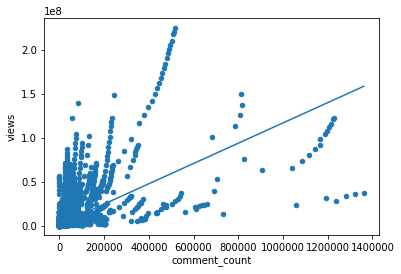

In [8]:
x2_new = pd.DataFrame()
x2_new['comment_count'] = np.linspace(df_us['comment_count'].min(), df_us['comment_count'].max(), num=200)

y2_new = pd.Series(
    model2.predict(x2_new).ravel(),
    index=x2_new['comment_count']
)

df_us.plot.scatter(x='comment_count', y='views')
y2_new.plot.line()

> We can see that in the graph above, there is clearly no correlation in the linear regression based on comment count.

## Dislikes Regression Plot

In [9]:
x3_train, x3_test, y3_train, y3_test = train_test_split(df_us[['dislikes']], df_us[['views']], test_size=0.2)

model3 = LinearRegression()
model3.fit(X=x3_train, y=y3_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

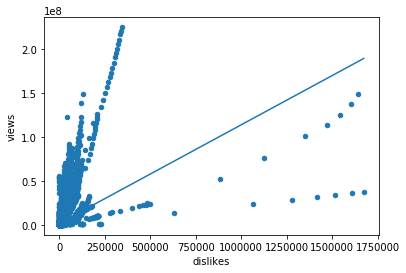

In [10]:
x3_new = pd.DataFrame()
x3_new['dislikes'] = np.linspace(df_us['dislikes'].min(), df_us['dislikes'].max(), num=200)

y3_new = pd.Series(
    model3.predict(x3_new).ravel(),
    index=x3_new['dislikes']
)

df_us.plot.scatter(x='dislikes', y='views')
y3_new.plot.line()

> Although the correlation is not perfectly linear, we can see a linear shape in the data between the dislikes and views features